# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
 
btc_response_data = requests.get(btc_url).json()
#print(json.dumps(btc_response_data, indent=4))

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
#print(json.dumps(eth_response_data, indent=4))

# Compute current value of my crpto
# YOUR CODE HERE!
btc_current_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
#print(btc_current_value)
eth_current_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
#print(eth_current_value)

print(f"The current market price of BTC is ${btc_current_value:0.2f}")
print(f"The current market price of ETH is ${eth_current_value:0.2f}")

The current market price of BTC is $55188.79
The current market price of ETH is $3870.45


In [6]:
# Print current crypto wallet balance
my_btc_value = my_btc * btc_current_value 
my_eth_value = my_eth * eth_current_value 

#total crypto wallet balance 

total_crypto_balance = my_btc_value + my_eth_value
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"Total value of your crypto wallet is:  ${total_crypto_balance:0.2f}")

The current value of your 1.2 BTC is $66226.55
The current value of your 5.3 ETH is $20513.36
Total value of your crypto wallet is:  $86739.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#alpaca

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2016-09-20", tz="America/New_York").isoformat()
end_today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_Investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end= end_today,
    limit=1000).df

df_Investments.dropna(inplace=True)
# Drop the time component of the date
df_Investments.index = df_Investments.index.date
# Preview DataFrame
df_Investments.tail()

 

AGG                                           SPY            \
              open      high       low   close    volume    open      high   
2020-04-27  117.21  117.3600  116.8200  116.84   6707494  285.12  288.2700   
2020-04-28  117.27  117.4500  117.1200  117.25  10729690  291.02  291.4000   
2020-04-29  117.29  117.4800  117.2000  117.43   9036494  291.53  294.8800   
2020-04-30  117.38  117.4900  117.0650  117.15  13756340  291.71  293.3239   
2020-05-01  116.97  117.0998  116.6775  116.90  11778582  285.31  290.6572   

                                       
               low   close     volume  
2020-04-27  284.62  287.11  135955115  
2020-04-28  285.40  285.77  192772205  
2020-04-29  290.41  293.19  204606690  
2020-04-30  288.59  290.39  204197726  
2020-05-01  281.52  282.73  222309009

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_Investments["AGG"]["close"].iloc[-1]
                                                
spy_close_price = df_Investments["SPY"]["close"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: CAD ${agg_close_price:0.2f}")
print(f"Current SPY closing price: CAD ${spy_close_price:0.2f}")


Current AGG closing price: CAD $116.90
Current SPY closing price: CAD $282.73


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
total_investments = my_spy_value + my_agg_value
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"Total value of your stock investments is:  ${total_investments:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00
Total value of your stock investments is:  $37516.50


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income=12000

In [13]:
# Consolidate financial assets data


In [14]:
# Create savings DataFrame
dict_savings = {'amount': [total_crypto_balance, total_investments]}
index_list = ['crypto', 'shares']
df_savings = pd.DataFrame(data=dict_savings, index=index_list)

# Display savings DataFrame
display(df_savings)

,amount
crypto,86739.907907
shares,37516.500000


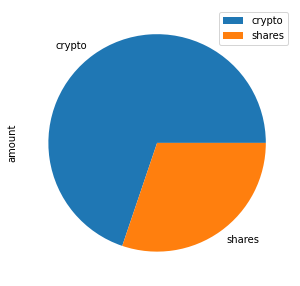

In [15]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='amount', figsize=(5, 5))

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print(emergency_fund)

# Calculate total amount of savings
combined_total_balance = total_crypto_balance + total_investments
print(f"Combined balance with Crypto and Investments: ${total_investments:0.2f}")

# Validate saving health
if combined_total_balance > emergency_fund:
    print("Congratulations! You have enough money in this fund")
elif combined_total_balance == emergency_fund:
        print("congratulating the person on reaching this financial goal.")
else:
     dollars_away = emergency_fund - combined_total_balance 
     print(f"Error: not enough funds! However, you are ${dollars_away:0.2f} from your financial goal")

Combined balance with Crypto and Investments: $37516.50
Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
#start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
# Format current date as ISO format
start_today = pd.Timestamp("2016-05-01", tz="America/New_York").isoformat()
stop_today = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_today,
    end= stop_today,
    limit=1000).df

df_stock_data.dropna(inplace=True)
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Preview DataFrame
#df_stock_data.tail()

# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open     high       low    close     volume    open    high   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0  240.62  240.67   
2017-05-17  109.35  109.600  109.2800  109.560  2263851.0  238.10  238.64   

                                          
               low    close       volume  
2017-05-11  238.13  239.410   45435690.0  
2017-05-12  238.67  239.030   35283567.0  
2017-05-15  239.45  240.245   42230620.0  
2017-05-16  239.63  240.100   37206183.0  
2017-05-17  235.75  235.850  118613594.0

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60 ],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0          NaN   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   
2017-05-17  109.35  109.600  109.2800  109.560  2263851.0     0.005138   

               SPY                                                     
              open    high     low    close       volume daily_return  
2017-05-11  239.35  239.57  238.13  239.410   45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030   35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245   42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100   37206183.0    -0.000604  
2017-05-17  238.10  238.64  235.75  235.850  118613594.0    -0.017701

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003012,1.012135,1.005983,1.017405,0.999900,1.013919,1.005286,1.019184,1.001093,0.988709,...,1.012410,0.990972,0.995629,0.987897,1.010706,0.998239,1.009666,1.004896,0.993029,1.008385
2,1.005876,1.021804,1.003040,1.013516,1.021245,1.014720,1.011142,1.014551,0.998558,0.986409,...,1.003846,1.014954,0.992272,0.992922,1.004540,1.001043,1.030972,1.011216,0.997057,1.018942
3,1.003168,1.035077,0.997908,1.004899,1.034853,1.021723,1.015612,1.012975,0.996449,0.977182,...,1.008020,1.006101,0.998046,0.992219,1.000378,0.997529,1.041596,0.999374,1.005671,1.019999
4,1.000241,1.039757,1.004709,1.007676,1.030249,1.026476,1.025497,1.000825,1.001396,0.992896,...,1.002560,1.013447,0.968731,0.979482,0.996567,1.002639,1.051077,0.991655,1.009799,1.011009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.188529,9.933047,20.340913,9.914938,18.669606,8.609463,26.967869,39.563364,29.787762,17.206955,...,28.727918,12.005991,24.770732,17.042170,41.198658,17.181860,19.352335,11.914060,2.880441,13.976838
7557,13.214590,10.054793,20.547200,10.090427,18.746783,8.586266,27.032774,39.736893,29.734631,17.224666,...,28.797850,12.065064,24.865572,17.149174,41.863004,17.210087,19.438150,11.924442,2.902199,13.926128
7558,13.282660,9.965001,20.539613,10.039235,18.868629,8.647702,26.967939,40.075135,29.579297,17.197970,...,28.619180,12.118976,24.939258,17.248326,41.738144,17.223953,19.422838,11.983049,2.918967,13.947317
7559,13.347305,10.036523,20.472581,10.100278,18.839657,8.669154,27.093342,40.222786,29.764224,17.100536,...,28.548377,12.144226,25.173702,17.352272,41.999436,17.229908,19.337525,11.982402,2.912647,13.993638


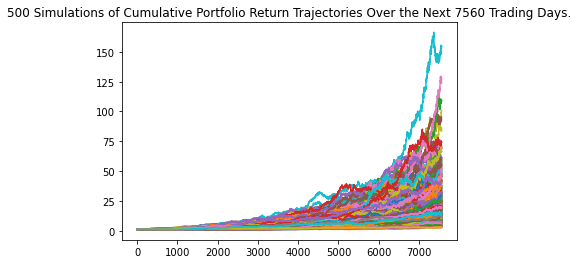

In [22]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year.png", bbox_inches="tight")

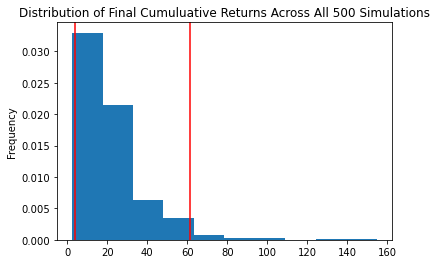

In [23]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.977704
std              17.298564
min               2.362835
25%              11.323715
50%              17.565060
75%              26.406681
max             154.686006
95% CI Lower      3.922334
95% CI Upper     61.244370
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $78446.68 and $1224887.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $117670.02 and $1837331.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [32]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")